***Fundamentals of Artificial Intelligence***

> **Lab 4:** *Learning* <br>

> **Performed by:** *Corneliu Catlabuga*, group *FAF-213* <br>

> **Verified by:** Elena Graur, asist. univ.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = 'data/data.csv'
df = pd.read_csv(DATA_PATH, low_memory=False)

columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

In [2]:
display(df.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
display(df[columns].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.00,148650.00,148650.00,112491.00,148654.00,148654.00
mean,66325.45,5066.06,3648.77,25007.89,74768.32,93692.55
std,42764.64,11454.38,8056.60,15402.22,50517.01,62793.53
min,-166.01,-0.01,-7058.59,-33.89,-618.13,-618.13
25%,33588.20,0.00,0.00,11535.40,36169.00,44065.65
50%,65007.45,0.00,811.27,28628.62,71426.61,92404.09
75%,94691.05,4658.18,4236.07,35566.85,105839.13,132876.45
max,319275.01,245131.88,400184.25,96570.66,567595.43,567595.43


In [4]:
# Display the number of entries for non-numerical columns
entries = len(df)
num_job_titles = df['JobTitle'].nunique()
num_agencies = df['Agency'].nunique()
num_statuses = df['Status'].nunique()

display(pd.DataFrame({
    'Column': ['Entries', 'Job Titles', 'Agencies', 'Statuses'],
    'Count': [entries, num_job_titles, num_agencies, num_statuses]
}))

,Column,Count
0,Entries,148654
1,Job Titles,2159
2,Agencies,1
3,Statuses,2


In [5]:
# Get unique values for the 'Agency' column and 'Status' column
agencies = df['Agency'].unique()
statuses = df['Status'].unique()

print('Agencies:', agencies)
print('Statuses:', statuses)

Agencies: ['San Francisco']
Statuses: [nan 'PT' 'FT']


In [6]:

def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    # Set the 'EmployeeName' column to uppercase
    data['EmployeeName'] = data['EmployeeName'].str.upper()

    data['Status'] = data['Status'].map({'FT': 1, 'PT': 2}).fillna(0)

    # Remove rows with missing values
    data = data[data["EmployeeName"] != "Not provided"]

    # Remove rows with negative values in the 'BasePay' column
    data = data[data["BasePay"] >= 0]
    data = data[data["OvertimePay"] >= 0]
    data = data[data["OtherPay"] >= 0]
    data = data[data["Benefits"] >= 0]
    data = data[data["TotalPay"] >= 0]

    return data

clean_df = clean_data(df)
clean_df.to_csv('data/cleaned_data.csv', index=False)

In [7]:
display(clean_df.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36159,36160,GARY ALTENBERG,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco,0.0
36160,36161,GREGORY SUHR,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco,0.0
36161,36162,KHOA TRINH,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,NaN,San Francisco,0.0
36162,36163,JOANNE HAYES-WHITE,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,San Francisco,0.0
36163,36164,FREDERICK BINKLEY,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,NaN,San Francisco,0.0


In [8]:
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
clean_df[columns] = clean_df[columns].apply(pd.to_numeric, errors='coerce')

display(clean_df[columns].describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,111868.00,111868.00,111868.00,111868.00,111868.00,111868.00
mean,67215.61,5267.14,3655.45,25117.34,76138.20,101255.54
std,43414.62,11765.31,8039.13,15371.43,51266.88,65244.39
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,33665.61,0.00,0.00,12158.64,37064.68,49698.13
50%,65548.64,0.00,821.10,28699.57,72635.20,101977.38
75%,95229.03,4867.80,4308.62,35609.47,107541.07,143001.72
max,319275.01,220909.48,342802.63,96570.66,471952.64,510732.68


<Axes: title={'center': 'Heatmap of Correlation Matrix'}>

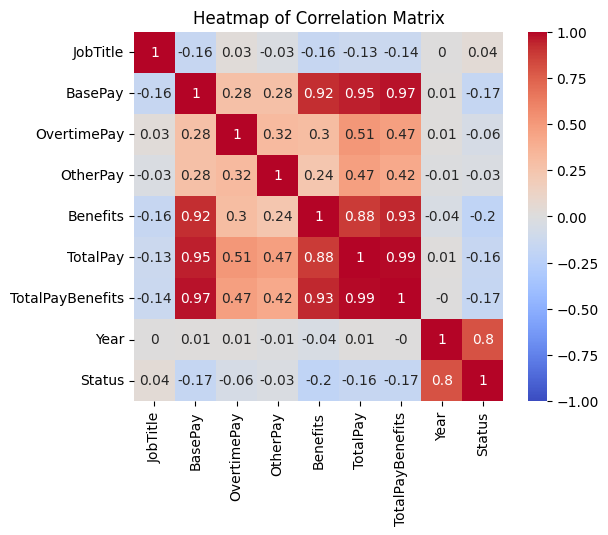

In [9]:
def get_correlation_matrix(data: pd.DataFrame) -> pd.DataFrame:
    """Get the level of correlation between the columns of the data.

    :param data: The data to analyze.
    :return: A list of lists, where each list represents the correlation between the columns of the data.
    """
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    le.fit(data["JobTitle"])
    data["JobTitle"] = le.transform(data["JobTitle"])

    data = data.apply(pd.to_numeric, errors="coerce")
    correlation_matrix = data.corr()
    correlation_matrix = correlation_matrix.dropna(axis=0, how="all")
    correlation_matrix = correlation_matrix.dropna(axis=1, how="all")
    correlation_matrix = correlation_matrix.round(2)
    correlation_matrix = correlation_matrix.iloc[1:, 1:]

    return correlation_matrix


plt.clf()
plt.title('Heatmap of Correlation Matrix')
sns.heatmap(get_correlation_matrix(clean_df), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)

<Axes: title={'center': 'Benefits and BasePay'}, xlabel='BasePay', ylabel='Benefits'>

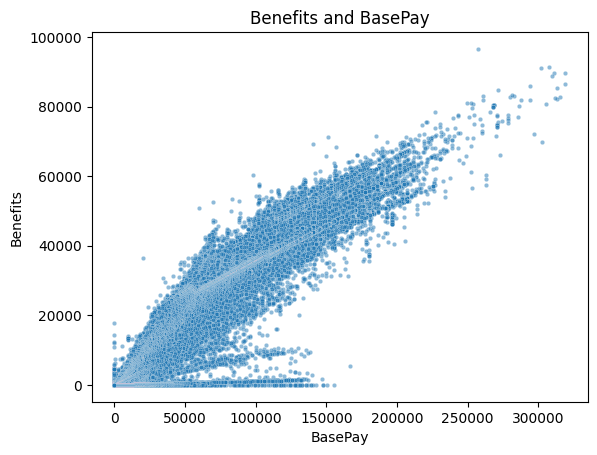

In [10]:
plt.clf()
plt.title('Benefits and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="Benefits", alpha=0.5, s=10)

<Axes: title={'center': 'OtherPay and BasePay'}, xlabel='BasePay', ylabel='OtherPay'>

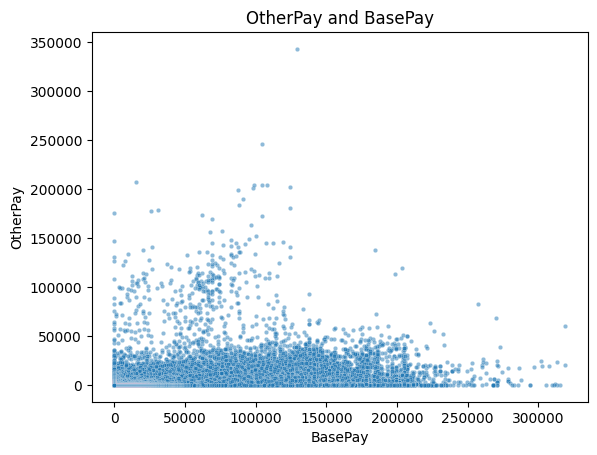

In [11]:
plt.clf()
plt.title('OtherPay and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="OtherPay", alpha=0.5, s=10)

<Axes: title={'center': 'OvertimePay and BasePay'}, xlabel='BasePay', ylabel='OvertimePay'>

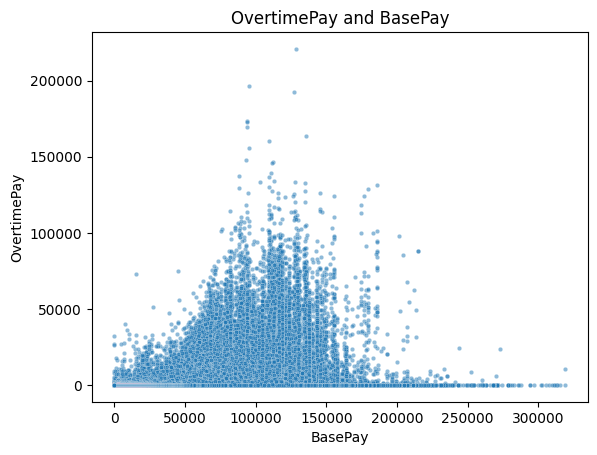

In [12]:
plt.clf()
plt.title('OvertimePay and BasePay')
sns.scatterplot(data=clean_df, x="BasePay", y="OvertimePay", alpha=0.5, s=10)

R^2: 0.8427286314065663
Intercept: 3270.31011563462
Coefficient: [0.32502914]


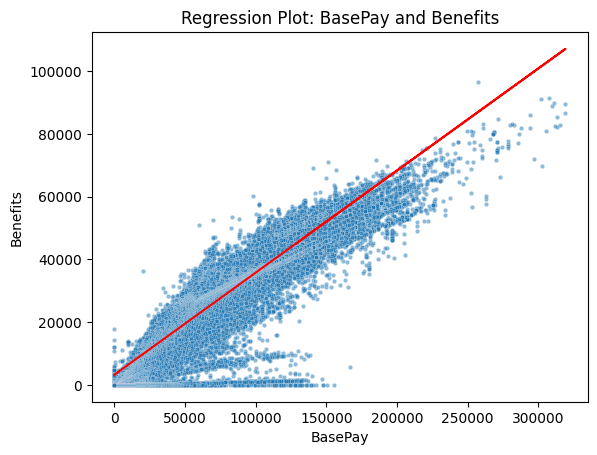

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]
model.fit(base_pay, benefits_pay)
r_squared = model.score(base_pay, benefits_pay)
print(f"R^2: {r_squared}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

y_pred = model.predict(base_pay)
plt.clf()
plt.title("Regression Plot: BasePay and Benefits")
sns.scatterplot(data=clean_df, x="BasePay", y="Benefits", alpha=0.5, s=10)
plt.plot(base_pay, y_pred, color='red')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]

base_pay_train, base_pay_test, benefits_pay_train, benefits_pay_test = train_test_split(base_pay, benefits_pay, test_size=0.2, random_state=42)

scaler = StandardScaler()
base_pay_train = scaler.fit_transform(base_pay_train)
base_pay_test = scaler.transform(base_pay_test)

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(base_pay_train, benefits_pay_train)
lasso_pred = lasso_model.predict(base_pay_test)

lassso_mse = mean_squared_error(benefits_pay_test, lasso_pred)
lassso_r2 = r2_score(benefits_pay_test, lasso_pred)

print(f"Lasso MSE: {lassso_mse}")
print(f"Lasso R^2: {lassso_r2}")

Lasso MSE: 37403627.020051986
Lasso R^2: 0.8405734519319463


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

base_pay = clean_df["BasePay"].values.reshape(-1, 1)
benefits_pay = clean_df["Benefits"]

base_pay_train, base_pay_test, benefits_pay_train, benefits_pay_test = train_test_split(base_pay, benefits_pay, test_size=0.2, random_state=42)

scaler = StandardScaler()
base_pay_train = scaler.fit_transform(base_pay_train)
base_pay_test = scaler.transform(base_pay_test)

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(base_pay_train, benefits_pay_train)
ridge_pred = ridge_model.predict(base_pay_test)

ridge_mse = mean_squared_error(benefits_pay_test, ridge_pred)
ridge_r2 = r2_score(benefits_pay_test, ridge_pred)

print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R^2: {ridge_r2}")

Ridge MSE: 37403629.08049081
Ridge R^2: 0.840573443149679


<Axes: title={'center': 'KMeans Clustering of Features'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

<Figure size 640x480 with 0 Axes>

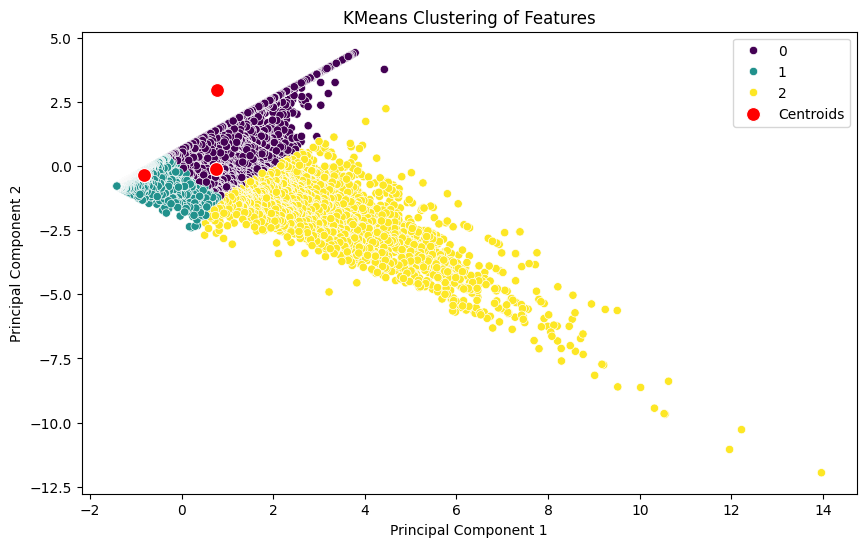

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = clean_df[["BasePay", "OvertimePay"]]
features = features.apply(pd.to_numeric, errors="coerce").dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.clf()
plt.figure(figsize=(10, 6))
plt.title("KMeans Clustering of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette="viridis")
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color="red", s=100, label="Centroids")